In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

# Longitudinal

In [23]:
lg_df = pd.read_csv('oasis_longitudinal.csv')

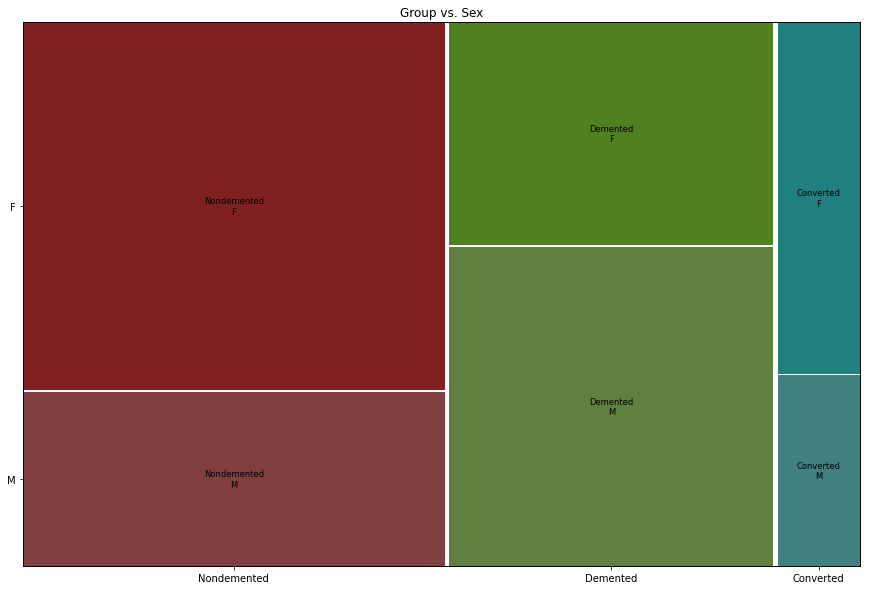

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
mosaic(lg_df, ['Group', 'M/F'], title='Group vs. Sex', ax=ax)
plt.show()

In [25]:
lg_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [26]:
lg_df[lg_df.isna().any(axis=1)]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [27]:
lg_df.loc[lg_df['Group'] == 'Converted'].shape

(37, 15)

In [28]:
lg_df.loc[lg_df['CDR'] == 0.5, 'Group'] = 'Demented'

In [29]:
lg_df.loc[lg_df['CDR'] == 0.0, 'Group'] = 'Nondemented'

In [30]:
convert = {'Nondemented': 0, 'Demented': 1, 'Converted': 1}

lg_df.Group = [convert[i] for i in lg_df.Group]
lg_df = lg_df.rename(columns={'Group': 'Demented'})

In [31]:
lg_df = lg_df.drop(columns=['MRI ID', 'MR Delay', 'Hand'])

In [32]:
lg_df['Subject ID'] = lg_df['Subject ID'].str.lstrip('OAS2_')

In [33]:
lg_df['Subject ID'] = pd.to_numeric(lg_df['Subject ID'])

In [34]:
convert = {'M': 1, 'F': 0}

lg_df = lg_df.rename(columns={'M/F': 'Sex'})
lg_df.Sex = [convert[i] for i in lg_df.Sex]

In [35]:
lg_df = lg_df[~lg_df.isna().any(axis=1)]

In [36]:
lg_df.columns

Index(['Subject ID', 'Demented', 'Visit', 'Sex', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

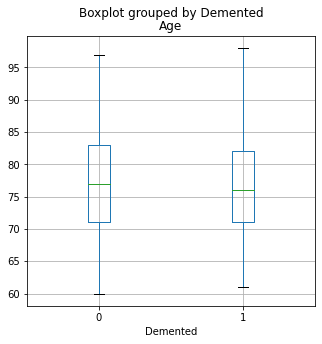

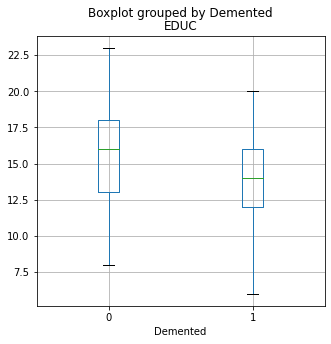

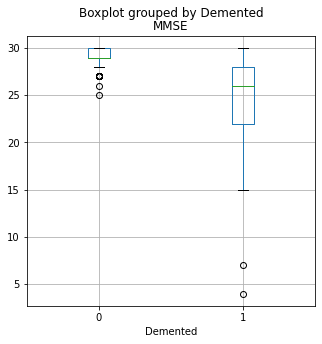

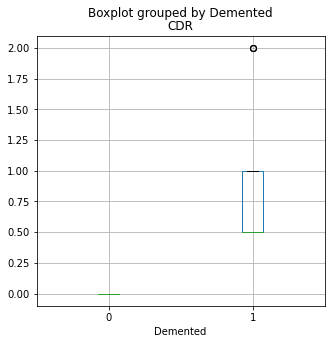

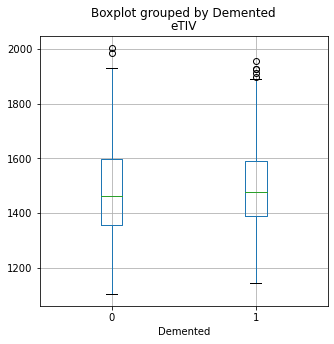

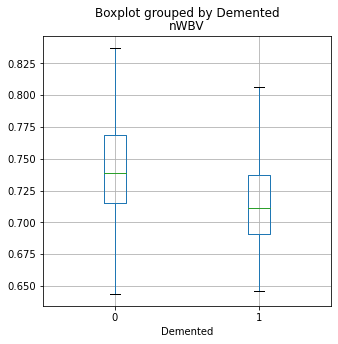

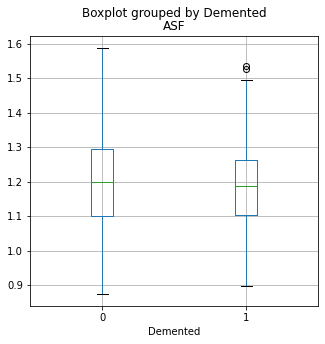

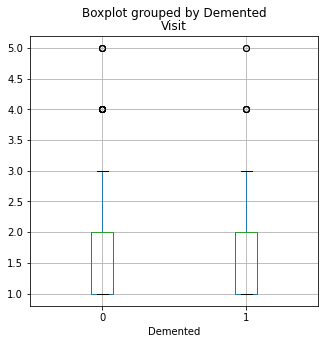

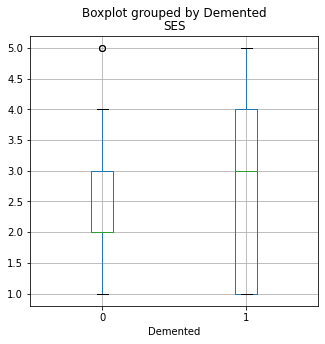

In [37]:
for column in ['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Visit', 'SES']:
    lg_df.boxplot(column=[column], by='Demented', figsize=(5, 5))

In [38]:
corr = lg_df.corr()

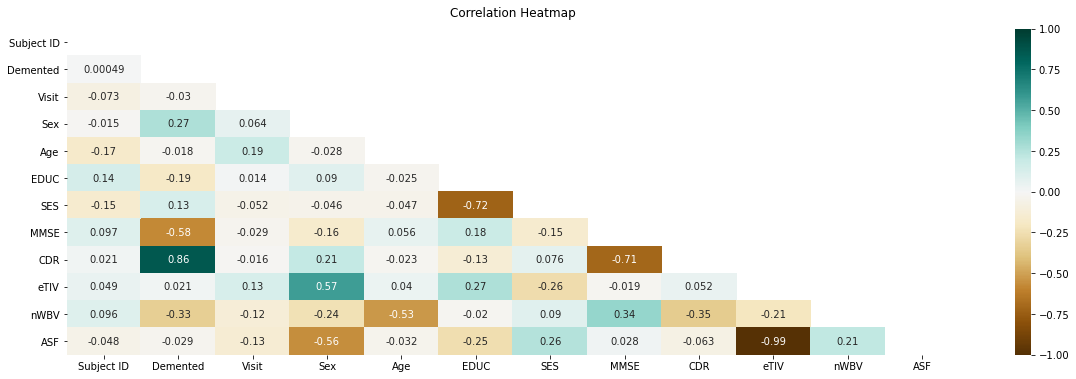

In [18]:
plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
lg_df = lg_df.drop(columns=['ASF', 'CDR'])

In [20]:
lg_df.to_csv('lg_data.tsv', sep='\t', index=False)

In [21]:
lg_df

,Subject ID,Demented,Visit,Sex,Age,EDUC,SES,MMSE,eTIV,nWBV
0,1,0,1,1,87,14,2.0,27.0,1987,0.696
1,1,0,2,1,88,14,2.0,30.0,2004,0.681
5,4,0,1,0,88,18,3.0,28.0,1215,0.710
6,4,0,2,0,90,18,3.0,27.0,1200,0.718
7,5,0,1,1,80,12,4.0,28.0,1689,0.712
...,...,...,...,...,...,...,...,...,...,...
368,185,1,2,1,82,16,1.0,28.0,1693,0.694
369,185,1,3,1,86,16,1.0,26.0,1688,0.675
370,186,0,1,0,61,13,2.0,30.0,1319,0.801
371,186,0,2,0,63,13,2.0,30.0,1327,0.796


# Cross-sectional


In [39]:
cs_df = pd.read_csv('oasis_cross-sectional.csv')

In [41]:
cs_df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [42]:
cs_df['Demented'] = 0

In [49]:
cs_df.loc[cs_df['CDR'] >= 0.5, 'Demented'] = 1

In [50]:
cs_df.loc[cs_df['CDR'] == 0.0, 'Demented'] = 0

In [55]:
cs_df = cs_df.loc[~cs_df.ID.str.contains('MR2')]

In [56]:
cs_df = cs_df.drop(columns=['ID', 'Delay', 'Hand'])

In [57]:
cs_df = cs_df[~cs_df.isna().any(axis=1)]

In [58]:
lg_df.columns

Index(['Subject ID', 'Demented', 'Visit', 'Sex', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

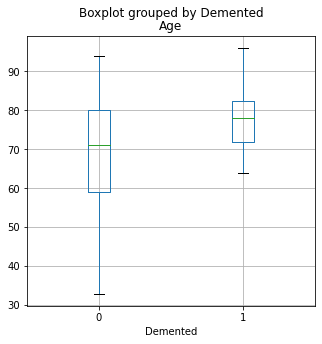

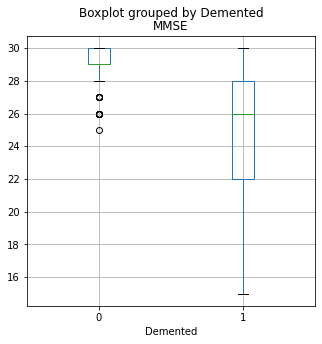

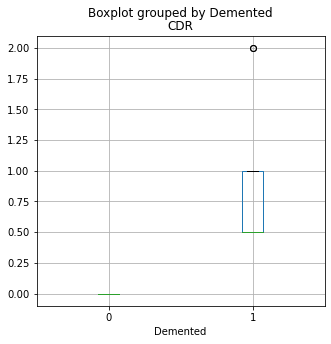

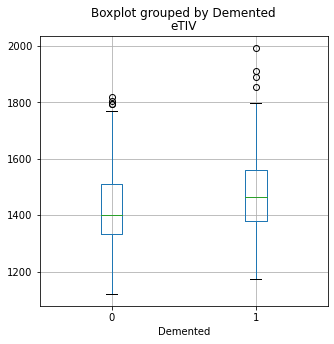

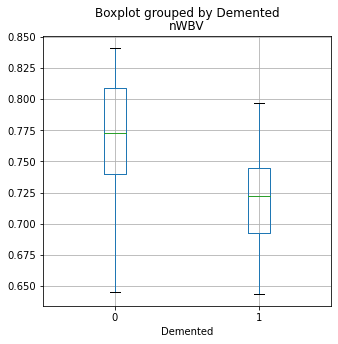

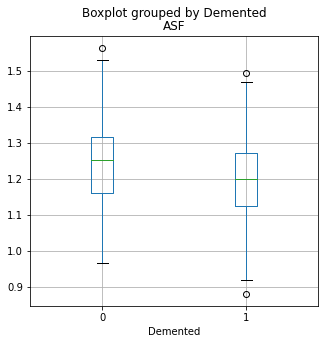

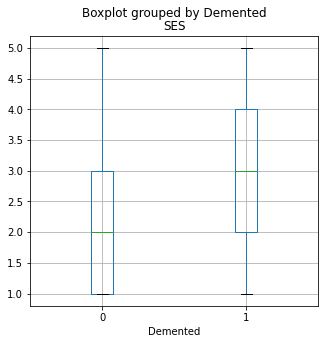

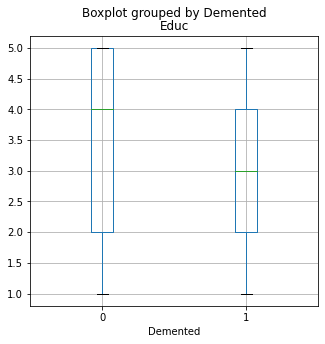

In [69]:
for column in ['Age', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'SES', 'Educ']:
    cs_df.boxplot(column=[column], by='Demented', figsize=(5, 5))

In [68]:
cs_df

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
9,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0
...,...,...,...,...,...,...,...,...,...,...
411,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355,1
412,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142,1
413,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297,0
414,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,0


In [63]:
corr = cs_df.corr()

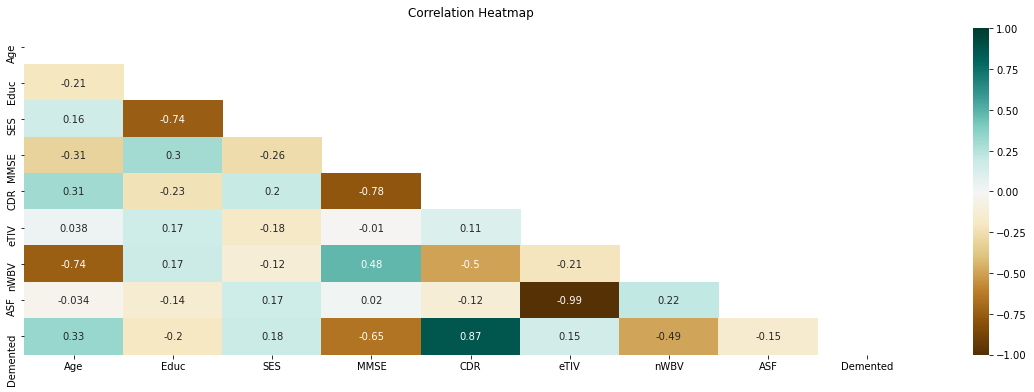

In [66]:
plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [70]:
cs_df = cs_df.drop(columns=['ASF', 'CDR'])

In [73]:
convert = {'M': 1, 'F': 0}

cs_df = cs_df.rename(columns={'M/F': 'Sex'})
cs_df.Sex = [convert[i] for i in cs_df.Sex]

In [74]:
cs_df.to_csv('cs_data.tsv', sep='\t', index=False)

In [72]:
cs_df

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,Demented
0,F,74,2.0,3.0,29.0,1344,0.743,0
1,F,55,4.0,1.0,29.0,1147,0.810,0
2,F,73,4.0,3.0,27.0,1454,0.708,1
8,M,74,5.0,2.0,30.0,1636,0.689,0
9,F,52,3.0,2.0,30.0,1321,0.827,0
...,...,...,...,...,...,...,...,...
411,F,70,1.0,4.0,29.0,1295,0.748,1
412,F,73,3.0,2.0,23.0,1536,0.730,1
413,F,61,2.0,4.0,28.0,1354,0.825,0
414,M,61,5.0,2.0,30.0,1637,0.780,0
